# 악성 판매자 탐지 결과 분석

## 목표
- 생성된 Feature 분포 확인
- 악성 vs 정상 판매자 비교
- 시각화를 통한 인사이트 도출

## 1. 패키지 Import 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['font.family'] = 'AppleGothic'  # Mac
plt.rcParams['axes.unicode_minus'] = False

# 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ 패키지 import 완료")

✅ 패키지 import 완료


In [2]:
# 데이터 로드
df = pd.read_csv('../output/seller_features_real_sentiment.csv')

print(f"데이터 크기: {df.shape}")
print(f"\n컬럼 목록 ({len(df.columns)}개):")
print(df.columns.tolist())
print(f"\n처음 5행:")
print(df.head())

데이터 크기: (180, 23)

컬럼 목록 (23개):
['vendor_name', 'avg_rating', 'rating_std', 'low_rating_ratio', 'avg_review_length', 'duplicate_review_ratio', 'negative_keyword_ratio', 'textless_5star_ratio', 'review_count', 'review_density', 'question_count', 'refund_question_ratio', 'defect_question_ratio', 'authenticity_question_ratio', 'question_density', 'question_review_ratio', 'negative_sentiment_ratio', 'avg_sentiment_score', 'rating_normalized', 'rating_sentiment_gap', 'product_count', 'abusive_label', 'conditions_met_count']

처음 5행:
                               vendor_name  avg_rating  rating_std  \
0                              (주) 드림오피스유통    4.850000    0.489360   
1                                 (주)리빙스토리    4.333333    1.278019   
2                       (주)씨제이이엔엠 (CJ온스타일)    2.571429    1.511858   
3  (주)어거스트포코리아(AUGUST FOUR KOREA Co.,Ltd.)    4.000000    0.000000   
4                               (주)에스티아이그룹    4.000000    0.000000   

   low_rating_ratio  avg_review_length  duplic

## 2. 기본 통계

In [3]:
# 라벨 분포
print("=== 라벨 분포 ===")
label_counts = df['abusive_label'].value_counts().sort_index()

for label, count in label_counts.items():
    label_name = "정상" if label == 0 else "악성"
    percentage = count / len(df) * 100
    print(f"{label_name} 판매자: {count}명 ({percentage:.1f}%)")

# 정상/악성 판매자 존재 여부 확인
has_normal = 0 in label_counts.index
has_abusive = 1 in label_counts.index

print(f"\n정상 판매자 존재: {'있음' if has_normal else '없음'}")
print(f"악성 판매자 존재: {'있음' if has_abusive else '없음'}")

# 라벨별 통계 (둘 다 있을 때만)
if has_normal and has_abusive:
    print("\n=== 라벨별 주요 Feature 평균 ===")
    key_features = ['review_density', 'question_density', 'avg_rating', 
                    'negative_sentiment_ratio', 'question_review_ratio']
    
    comparison = df.groupby('abusive_label')[key_features].mean()
    comparison.index = ['정상', '악성'] if 0 in comparison.index else ['악성']
    print(comparison.round(3))
else:
    print("\n⚠️ 정상 또는 악성 판매자가 없어서 비교 분석을 건너뜁니다.")

=== 라벨 분포 ===
악성 판매자: 180명 (100.0%)

정상 판매자 존재: 없음
악성 판매자 존재: 있음

⚠️ 정상 또는 악성 판매자가 없어서 비교 분석을 건너뜁니다.


## 3. 라벨 분포 시각화

/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/1694273794.py:22: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/1694273794.py:22: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/1694273794.py:22: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/1694273794.py:22: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/1694273794.py:22: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/1694273794.py:22: User

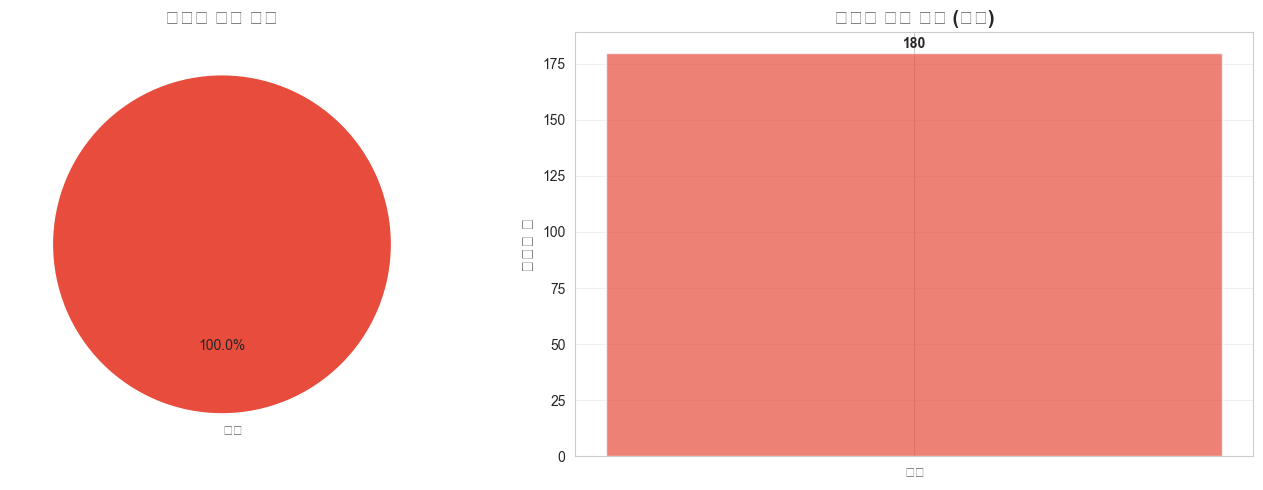

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 라벨 이름 매핑
label_names = {0: '정상', 1: '악성'}
labels = [label_names[label] for label in label_counts.index]
sizes = label_counts.values
colors = ['#2ecc71', '#e74c3c'] if len(labels) == 2 else ['#e74c3c']

# 파이 차트
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('판매자 라벨 분포', fontsize=14, fontweight='bold')

# 막대 차트
axes[1].bar(labels, sizes, color=colors, alpha=0.7)
axes[1].set_ylabel('판매자 수', fontsize=12)
axes[1].set_title('판매자 라벨 분포 (막대)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(sizes):
    axes[1].text(i, v + 2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 4. 조건 충족 개수 분포

/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/3251233167.py:27: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/3251233167.py:27: UserWarning: Glyph 51313 (\N{HANGUL SYLLABLE JOG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/3251233167.py:27: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/3251233167.py:27: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/3251233167.py:27: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/3251233167.py:27: U

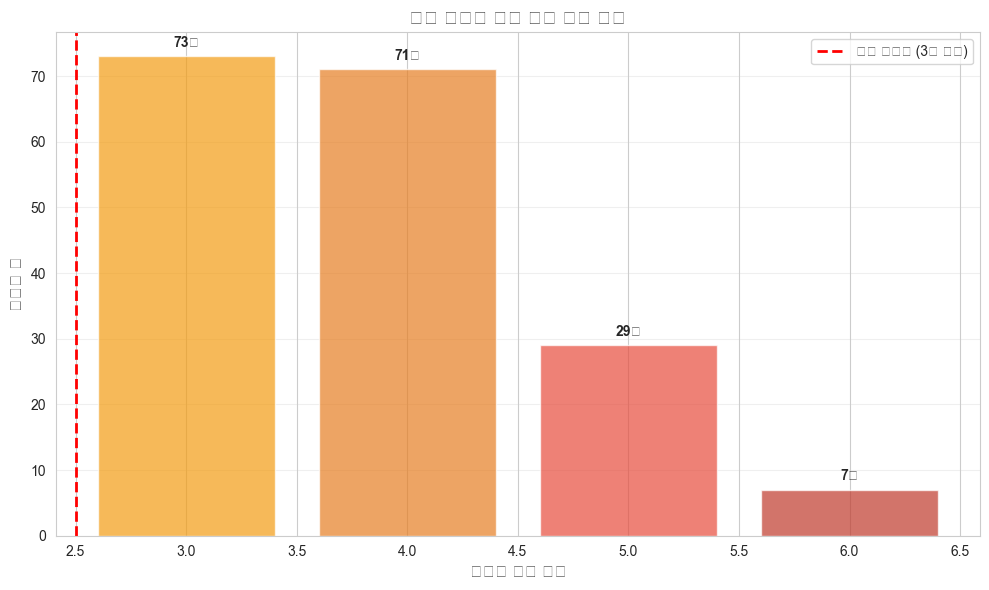


조건 충족 개수별 분포:
  3개 충족: 73명 (악성)
  4개 충족: 71명 (악성)
  5개 충족: 29명 (악성)
  6개 충족: 7명 (악성)


In [5]:
# 조건 충족 개수별 분포
conditions_dist = df['conditions_met_count'].value_counts().sort_index()

# 색상 설정 (0-2: 녹색, 3-6: 빨간색 계열)
colors_map = {0: '#27ae60', 1: '#2ecc71', 2: '#3498db', 
              3: '#f39c12', 4: '#e67e22', 5: '#e74c3c', 6: '#c0392b'}
bar_colors = [colors_map.get(i, '#95a5a6') for i in conditions_dist.index]

plt.figure(figsize=(10, 6))
bars = plt.bar(conditions_dist.index, conditions_dist.values, 
               color=bar_colors, alpha=0.7)

plt.axvline(x=2.5, color='red', linestyle='--', linewidth=2, label='악성 기준선 (3개 이상)')
plt.xlabel('충족한 조건 개수', fontsize=12)
plt.ylabel('판매자 수', fontsize=12)
plt.title('악성 판매자 조건 충족 개수 분포', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{int(height)}명',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n조건 충족 개수별 분포:")
for count, freq in conditions_dist.items():
    label = "악성" if count >= 3 else "정상"
    print(f"  {count}개 충족: {freq}명 ({label})")

## 5. 핵심 Feature 분포 (정상 vs 악성)

/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/343342640.py:52: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/343342640.py:52: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/343342640.py:52: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/343342640.py:52: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/343342640.py:52: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/343342640.py:52: UserWarnin

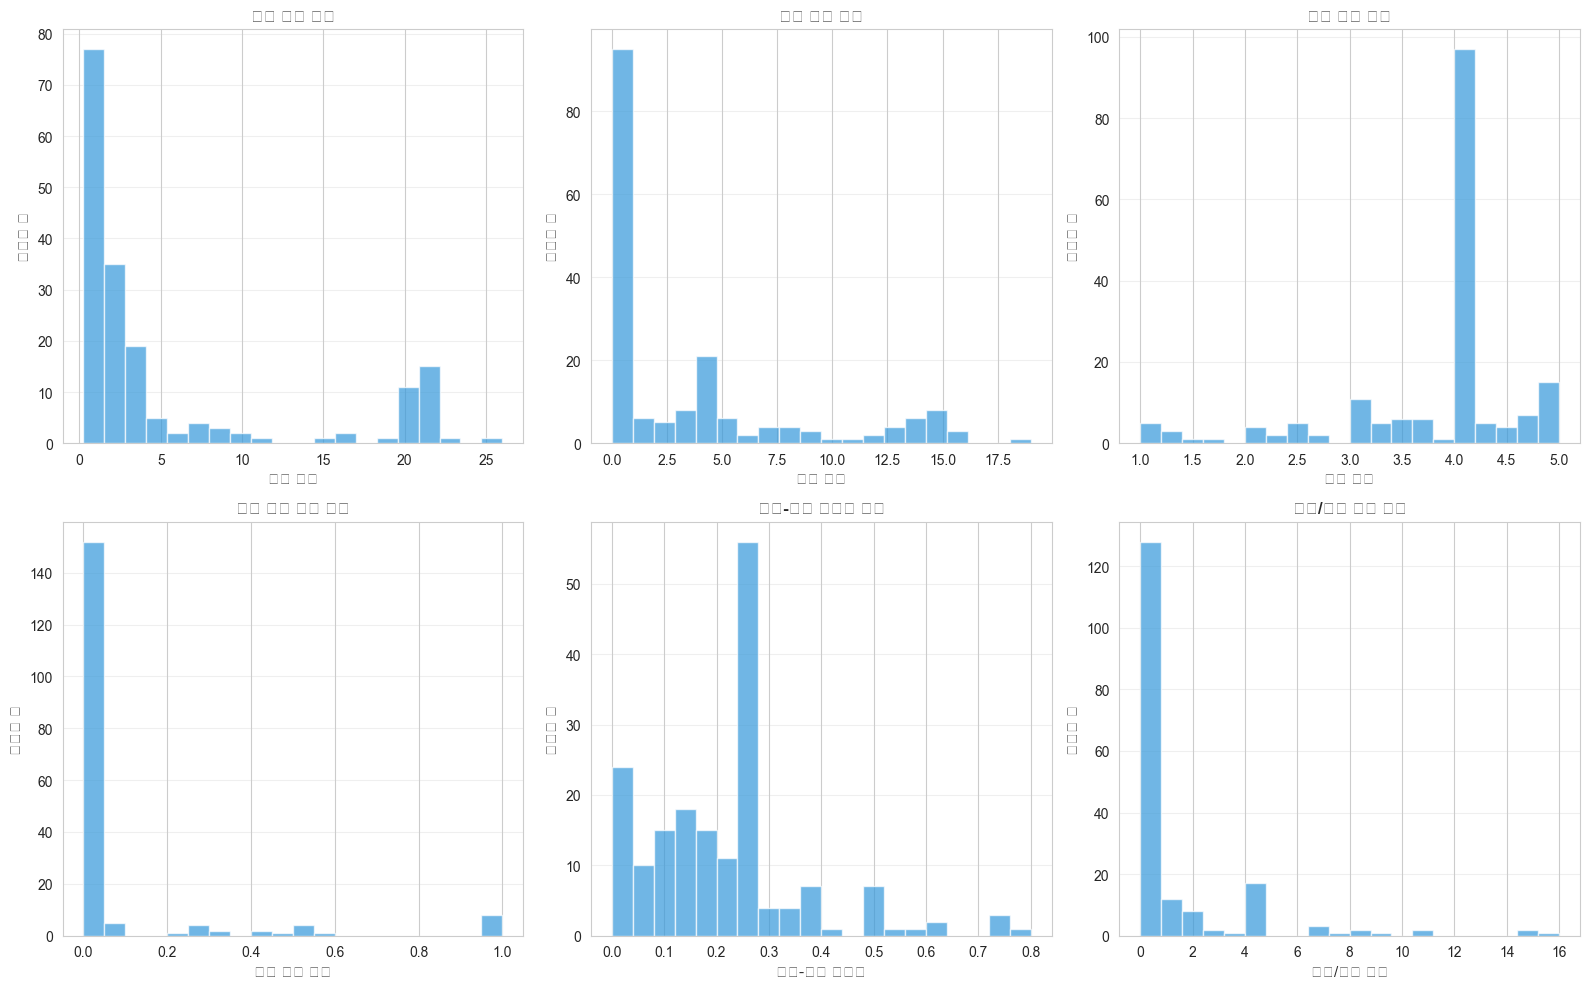

⚠️ 정상 또는 악성 중 하나만 존재하여 전체 분포만 표시합니다.


In [6]:
# 핵심 Feature 선택
key_features = [
    'review_density', 'question_density', 'avg_rating',
    'negative_sentiment_ratio', 'rating_sentiment_gap', 'question_review_ratio'
]

feature_names_kr = {
    'review_density': '리뷰 밀도',
    'question_density': '문의 밀도',
    'avg_rating': '평균 평점',
    'negative_sentiment_ratio': '부정 감성 비율',
    'rating_sentiment_gap': '평점-감성 괴리도',
    'question_review_ratio': '문의/리뷰 비율'
}

# 정상/악성 데이터 분리
normal = df[df['abusive_label'] == 0] if 0 in df['abusive_label'].values else pd.DataFrame()
abusive = df[df['abusive_label'] == 1] if 1 in df['abusive_label'].values else pd.DataFrame()

if len(normal) > 0 and len(abusive) > 0:
    # 둘 다 있을 때만 비교 그래프
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, feature in enumerate(key_features):
        ax = axes[idx]
        
        ax.hist([normal[feature], abusive[feature]], bins=20, 
                label=['정상', '악성'], color=['#2ecc71', '#e74c3c'], alpha=0.6)
        
        ax.set_xlabel(feature_names_kr[feature], fontsize=11)
        ax.set_ylabel('판매자 수', fontsize=11)
        ax.set_title(f'{feature_names_kr[feature]} 분포', fontsize=12, fontweight='bold')
        ax.legend()
        ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    # 한 가지만 있을 때는 전체 분포
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, feature in enumerate(key_features):
        ax = axes[idx]
        ax.hist(df[feature], bins=20, color='#3498db', alpha=0.7)
        ax.set_xlabel(feature_names_kr[feature], fontsize=11)
        ax.set_ylabel('판매자 수', fontsize=11)
        ax.set_title(f'{feature_names_kr[feature]} 분포', fontsize=12, fontweight='bold')
        ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    print("⚠️ 정상 또는 악성 중 하나만 존재하여 전체 분포만 표시합니다.")

## 6. Box Plot 비교

In [7]:
if len(normal) > 0 and len(abusive) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, feature in enumerate(key_features):
        ax = axes[idx]
        
        df_plot = df[['abusive_label', feature]].copy()
        df_plot['라벨'] = df_plot['abusive_label'].map({0: '정상', 1: '악성'})
        
        sns.boxplot(data=df_plot, x='라벨', y=feature, ax=ax,
                    palette={'정상': '#2ecc71', '악성': '#e74c3c'})
        
        ax.set_xlabel('판매자 유형', fontsize=11)
        ax.set_ylabel(feature_names_kr[feature], fontsize=11)
        ax.set_title(f'{feature_names_kr[feature]} 비교', fontsize=12, fontweight='bold')
        ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 비교할 두 그룹이 없어 Box Plot을 건너뜁니다.")

⚠️ 비교할 두 그룹이 없어 Box Plot을 건너뜁니다.


## 7. Feature 상관관계 분석

/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/2771194928.py:16: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/2771194928.py:16: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/2771194928.py:16: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/2771194928.py:16: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/2771194928.py:16: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/71/lzv2ww_d4j320ky8tgxwgr780000gn/T/ipykernel_34806/2771194928.py:16: U

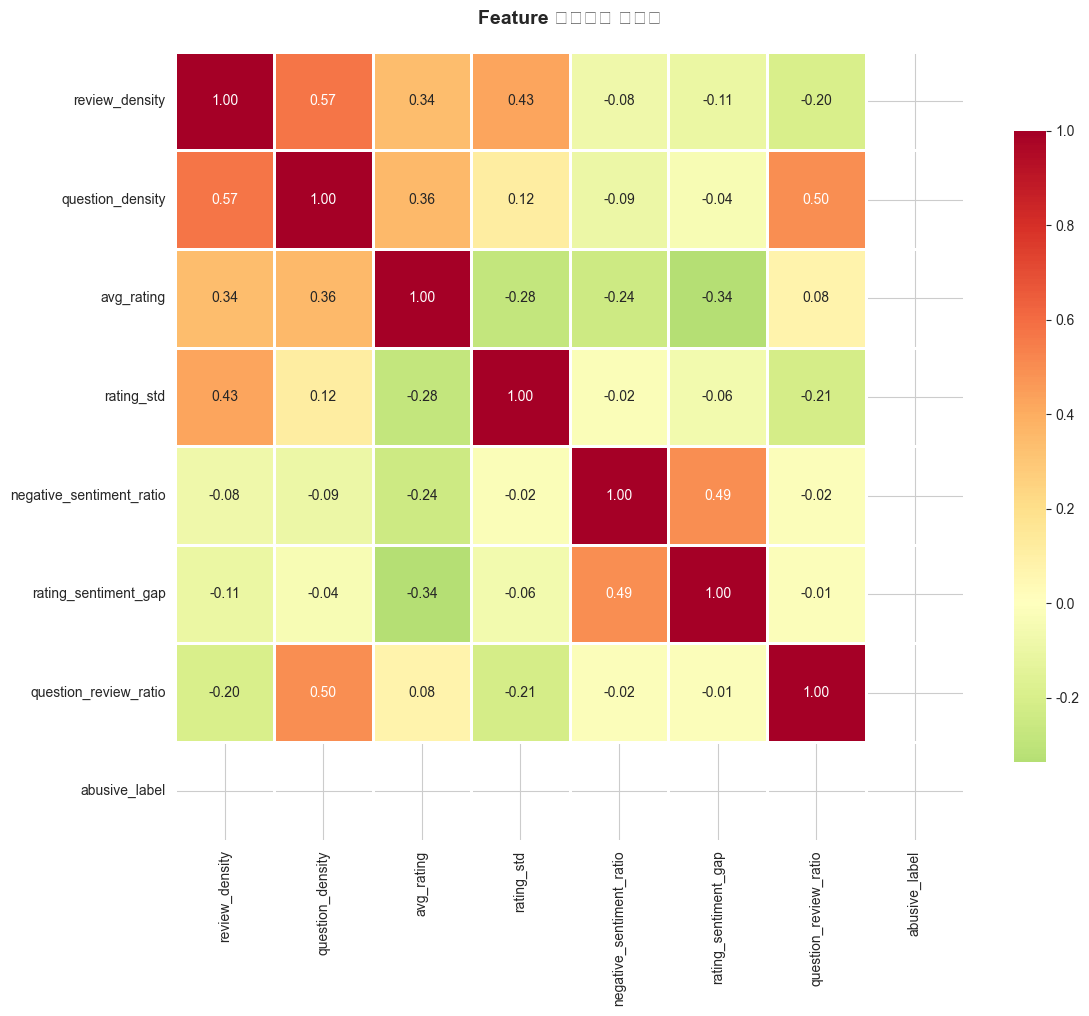


=== 악성 라벨과의 상관관계 (높은 순) ===
review_density                : +nan
question_density              : +nan
avg_rating                    : +nan
rating_std                    : +nan
negative_sentiment_ratio      : +nan
rating_sentiment_gap          : +nan
question_review_ratio         : +nan


In [8]:
# 상관관계 계산
correlation_features = [
    'review_density', 'question_density', 'avg_rating', 'rating_std',
    'negative_sentiment_ratio', 'rating_sentiment_gap', 
    'question_review_ratio', 'abusive_label'
]

corr_matrix = df[correlation_features].corr()

# 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn_r', 
            center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Feature 상관관계 히트맵', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 라벨과의 상관관계
print("\n=== 악성 라벨과의 상관관계 (높은 순) ===")
label_corr = corr_matrix['abusive_label'].drop('abusive_label').abs().sort_values(ascending=False)
for feature, corr_val in label_corr.items():
    actual_corr = corr_matrix.loc[feature, 'abusive_label']
    print(f"{feature:30s}: {actual_corr:+.3f}")

## 8. 상위/하위 판매자 분석

In [9]:
# 가장 의심스러운 판매자
print("=== 가장 의심스러운 판매자 (Top 10) ===")
top_suspicious = df.nlargest(10, 'conditions_met_count')[[
    'vendor_name', 'conditions_met_count', 'abusive_label',
    'review_density', 'negative_sentiment_ratio', 'avg_rating'
]]
print(top_suspicious.to_string(index=False))

print("\n=== 가장 건전한 판매자 (Top 10) ===")
top_healthy = df.nsmallest(10, 'conditions_met_count')[[
    'vendor_name', 'conditions_met_count', 'abusive_label',
    'review_density', 'negative_sentiment_ratio', 'avg_rating'
]]
print(top_healthy.to_string(index=False))

=== 가장 의심스러운 판매자 (Top 10) ===
                                        vendor_name  conditions_met_count  abusive_label  review_density  negative_sentiment_ratio  avg_rating
                                               마이다스                     6              1             1.0                       0.0    1.000000
앤커이노베이션코리아 주식회사 (Anker Innovations Korea Co., Ltd.)                     6              1             1.0                       0.0    2.000000
                                          주식회사 애들랜드                     6              1             1.0                       1.0    4.000000
                                           주식회사 지엑스                     6              1             1.0                       1.0    4.000000
                                          주식회사 혜윰베딩                     6              1             1.0                       1.0    4.000000
                                               캄컴퍼니                     6              1             1.0        

## 9. 평균 비교 시각화

In [10]:
if len(normal) > 0 and len(abusive) > 0:
    # 정상 vs 악성 평균 비교
    comparison_df = df.groupby('abusive_label')[key_features].mean()
    comparison_df.index = ['정상', '악성']
    
    # 정규화 (0-1 스케일)
    comparison_normalized = (comparison_df - comparison_df.min()) / (comparison_df.max() - comparison_df.min())
    
    # 막대 그래프
    comparison_normalized.T.plot(kind='bar', figsize=(12, 6), 
                                  color=['#2ecc71', '#e74c3c'], alpha=0.7)
    plt.title('정상 vs 악성 판매자 Feature 비교 (정규화)', fontsize=14, fontweight='bold')
    plt.ylabel('정규화된 값 (0-1)', fontsize=12)
    plt.xlabel('Feature', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='판매자 유형', fontsize=11)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n=== 정규화 전 실제 평균값 ===")
    print(comparison_df.round(3))
else:
    print("⚠️ 비교할 두 그룹이 없어 평균 비교를 건너뜁니다.")

⚠️ 비교할 두 그룹이 없어 평균 비교를 건너뜁니다.


## 10. 산점도 분석

In [ ]:
if len(normal) > 0 and len(abusive) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 1. 리뷰 밀도 vs 부정 감성 비율
    axes[0].scatter(normal['review_density'], normal['negative_sentiment_ratio'],
                    alpha=0.6, color='#2ecc71', label='정상', s=50)
    axes[0].scatter(abusive['review_density'], abusive['negative_sentiment_ratio'],
                    alpha=0.6, color='#e74c3c', label='악성', s=50)
    axes[0].set_xlabel('리뷰 밀도', fontsize=12)
    axes[0].set_ylabel('부정 감성 비율', fontsize=12)
    axes[0].set_title('리뷰 밀도 vs 부정 감성 비율', fontsize=13, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(alpha=0.3)
    
    # 2. 평균 평점 vs 평점-감성 괴리도
    axes[1].scatter(normal['avg_rating'], normal['rating_sentiment_gap'],
                    alpha=0.6, color='#2ecc71', label='정상', s=50)
    axes[1].scatter(abusive['avg_rating'], abusive['rating_sentiment_gap'],
                    alpha=0.6, color='#e74c3c', label='악성', s=50)
    axes[1].set_xlabel('평균 평점', fontsize=12)
    axes[1].set_ylabel('평점-감성 괴리도', fontsize=12)
    axes[1].set_title('평균 평점 vs 평점-감성 괴리도', fontsize=13, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 비교할 두 그룹이 없어 산점도를 건너뜁니다.")

⚠️ 비교할 두 그룹이 없어 산점도를 건너뜁니다.


## 11. 통계 요약

In [12]:
print("=" * 70)
print("최종 통계 요약")
print("=" * 70)

print(f"\n전체 판매자 수: {len(df)}명")

for label, count in label_counts.items():
    label_name = "정상" if label == 0 else "악성"
    percentage = count / len(df) * 100
    print(f"{label_name} 판매자: {count}명 ({percentage:.1f}%)")

if len(label_counts) == 2:
    print(f"클래스 불균형 비율: {max(label_counts)/min(label_counts):.2f}:1")

if len(normal) > 0 and len(abusive) > 0:
    print("\n=== 핵심 인사이트 ===")
    print(f"1. 리뷰 밀도 - 정상: {normal['review_density'].mean():.2f}, "
          f"악성: {abusive['review_density'].mean():.2f}")
    print(f"2. 부정 감성 비율 - 정상: {normal['negative_sentiment_ratio'].mean():.3f}, "
          f"악성: {abusive['negative_sentiment_ratio'].mean():.3f}")
    print(f"3. 평균 평점 - 정상: {normal['avg_rating'].mean():.2f}, "
          f"악성: {abusive['avg_rating'].mean():.2f}")

print("\n" + "=" * 70)

최종 통계 요약

전체 판매자 수: 180명
악성 판매자: 180명 (100.0%)



## 12. 데이터 저장 (분석 결과)

In [13]:
if len(normal) > 0 and len(abusive) > 0:
    # 분석 결과를 요약해서 저장
    summary_stats = pd.DataFrame({
        'Feature': key_features,
        '정상_평균': [normal[f].mean() for f in key_features],
        '악성_평균': [abusive[f].mean() for f in key_features],
        '차이': [abusive[f].mean() - normal[f].mean() for f in key_features]
    })
    
    summary_stats.to_csv('../output/feature_comparison.csv', index=False, encoding='utf-8-sig')
    print("✅ 분석 결과 저장: output/feature_comparison.csv")
    
    print("\n=== Feature 평균 비교 ===")
    print(summary_stats.round(3))
else:
    print("⚠️ 비교할 두 그룹이 없어 저장을 건너뜁니다.")
    
    # 전체 통계만 저장
    overall_stats = df[key_features].describe().T
    overall_stats.to_csv('../output/overall_stats.csv', encoding='utf-8-sig')
    print("✅ 전체 통계 저장: output/overall_stats.csv")

⚠️ 비교할 두 그룹이 없어 저장을 건너뜁니다.
✅ 전체 통계 저장: output/overall_stats.csv
